# Development for morphology trait extraction

This notebook gives examples and a platform to develop and visualize extraction on morphological traits
The functions used are define in a class "Traits_class" that you can find in the same folder (Morphology-analysis/Scripts/Traits_class.py).
If you want modify the "Traits_class.py" reload the module by running the first cell to see the modification appear in the notebook.

**Study case:**
To illustrate the morphology workflow and functionality, we are using the 2 images :

    + Morphology-analysis/Test_Data/INHS_FISH_000742_segmented.png
    + Morphology-analysis/Test_Data/INHS_FISH_18609_segmented.png
    

In [42]:
# load what you need
import Traits_class as tc
import json, sys
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image
import importlib
import skimage as ski
importlib.reload(tc)

<module 'Traits_class' from '/users/PAS2136/thibaulttabarin/Morphology-analysis/Scripts/Traits_class.py'>

In [43]:
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
#segmented_file = '../Test_Data/INHS_FISH_85194_segmented.png'
metadata_file = '../Test_Data/INHS_FISH_000742.json'

In [44]:
# Create the object segmented image create by the class during initialisation
img_seg = tc.segmented_image(segmented_file)

# oupput the variables create at initialization time
measure_bbox = img_seg.measurement_with_bbox # measurement using bbox
measure_lm = img_seg.measurement_with_lm # measurement using bbox
landmark = img_seg.landmark
presence_matrix = img_seg.presence_matrix
img_landmark = img_seg.visualize_landmark()

## 2 - Explore the output

    1- Presence Matrix
    2- Landmark
    3- Visualize landmark
    4- measurement

In [38]:
# presence dictionnary
presence_matrix


{'dorsal_fin': {'number': 1, 'percentage': 1.0},
 'adipos_fin': {'number': 0, 'percentage': 0},
 'caudal_fin': {'number': 1, 'percentage': 1.0},
 'anal_fin': {'number': 1, 'percentage': 1.0},
 'pelvic_fin': {'number': 1, 'percentage': 1.0},
 'pectoral_fin': {'number': 1, 'percentage': 1.0},
 'head': {'number': 1, 'percentage': 1.0},
 'eye': {'number': 1, 'percentage': 1.0},
 'caudal_fin_ray': {'number': 0, 'percentage': 0},
 'alt_fin_ray': {'number': 0, 'percentage': 0},
 'trunk': {'number': 2, 'percentage': 0.992120507069956}}

In [45]:
# measurement dictionnary with measurement using bbox
measure_bbox

{'SL_bbox': 587,
 'HL_bbox': 152,
 'ED_bbox': 31,
 'HD_eye': 100,
 'pOD_bbox': 30,
 'fish_angle': 2.0124973591623814}

In [46]:
# measurement dictionnary with measurement using landmarks
measure_lm

{'SL_lm': 586.0034129593445,
 'EA': 922,
 'HAt_lm': 8437.999999999995,
 'HAp': 16034,
 'ED': 34.262616074167774,
 'HL_lm': 151.64761785138597,
 'HD_lm': 158.3161394173064,
 'pOD_lm': 32.31098884280702}

In [54]:
measurement = {**measure_bbox, **measure_lm}
measurement

{'SL_bbox': 587,
 'HL_bbox': 152,
 'ED_bbox': 31,
 'HD_eye': 100,
 'pOD_bbox': 30,
 'fish_angle': 2.0124973591623814,
 'SL_lm': 586.0034129593445,
 'EA': 922,
 'HAt_lm': 8437.999999999995,
 'HAp': 16034,
 'ED': 34.262616074167774,
 'HL_lm': 151.64761785138597,
 'HD_lm': 158.3161394173064,
 'pOD_lm': 32.31098884280702}

In [7]:
# landmark dictionnary
landmark

{'1': (148, 36),
 '2': (66, 148),
 '3': (21, 301),
 '4': (106, 566),
 '5': (112, 606),
 '6': (150, 622),
 '7': (203, 592),
 '8': (200, 562),
 '9': (242, 478),
 '10': (279, 305),
 '11': (217, 169),
 '12': (162, 187),
 '13': (224, 138),
 '14': (136, 66),
 '15': (134, 96),
 '16': (115, 81),
 '17': (153, 81),
 '18': (135, 81)}

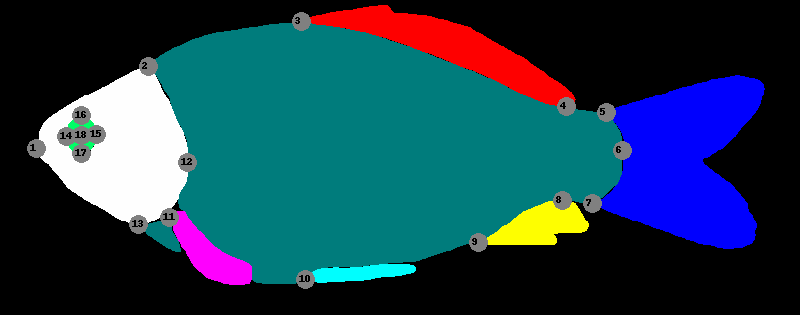

In [15]:
# Visualize landmarks 
img_landmark

## 3- Explore how the class works

    1. Create the object Masks extraction : 
    During the creattion of the object everything will happened automatically. We will detail the different step that has happened under the hood. The image is imported from the input file, the image is then convert in to 11 masks corresponding to each traits then, we clean the masks and extract morphological info such as area, centroid, landmarks... then we calculate the different measurements we want.
    2. Import the image and Masks extraction
    3. Clean the mask
    4.
    5. 

### 1- Masks extraction 

    + Import the image : 
    + Function to convert the image.png in to a disctionnary with key = trait ('trunk', 'dorsal_fin'...)
    masks = img_seg.mask
    + Visualize the mask
    


In [38]:
# Convert the image.png the dictionnary of mask
# 1- use the variable "mask" which is created by the function "img_seg.get_channels_mask()"
masks_dict = img_seg.mask

print("This is the list of the trait :",list(masks_dict.keys()))

This is the list of the trait : ['dorsal_fin', 'adipos_fin', 'caudal_fin', 'anal_fin', 'pelvic_fin', 'pectoral_fin', 'head', 'eye', 'caudal_fin_ray', 'alt_fin_ray', 'trunk']


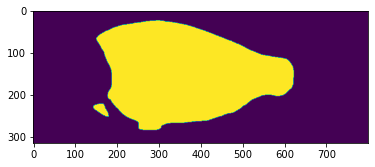

In [41]:
# Visualize the mask for a specific trait
trait_name = 'trunk'
plt.imshow(masks_dict[trait_name])

### 2- Clean the mask and presence matrix

Clean the mask involve:
 + Assessing the number of blob and decide what we keep and what we discard
 + Filling up hole in the blob
 + Create the presence matrix with Number of blob and the percentage of the biggest
 
We will use the module skimage.measure.regionprops to manipulate the mask, find the individual blobs and  access properties of the "region" (blob) such as centroid, area, bbox... (reference : https://scikit-image.org/docs/dev/api/skimage.measure.html)

In [ ]:
# Example of problem, the head trait mask as hole inisde correspond to the eye.
# we want the whole head especially if we want to calculate area


In [23]:
# Create a regionprop that has been cleaned
# Remove hole 
# Keep only the big blob
# regionprop_object has mutiple properties
regionprop_head = img_seg.clean_trait_region(masks_dict['head'])

area : 16034
centroid : (148.13259323936634, 119.70369215417239)


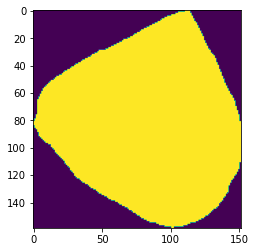

In [25]:
# Explore Regionprop_object properties
# full list of properties is here https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops
print("area :", regionprop_head.area)
print("centroid :", regionprop_head.centroid)
# display the image of the new mask correponding to the clean trait mask
plt.imshow(regionprop_head.image)

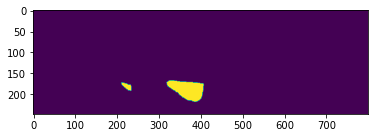

In [30]:
# Example with other image with 2 pevilc fins
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_18609_segmented.png'
img_seg_2 = tc.segmented_image(segmented_file)
masks_dict_2 = img_seg_2.mask
plt.imshow(masks_dict_2['pelvic_fin'])


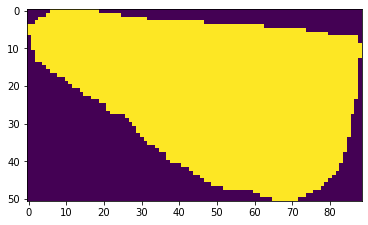

In [31]:
# During the clean step we remove the small blod and keep only the big one
regionprop_pelvic = img_seg.clean_trait_region(masks_dict_2['pelvic_fin'])
plt.imshow(regionprop_pelvic.image)

In [37]:
# The presence matrix is created using the following function
presence = img_seg_2.get_presence_matrix()
# or directly access the variable
presence = img_seg_2.presence_matrix
print(presence)

{'dorsal_fin': {'number': 1, 'percentage': 1.0}, 'adipos_fin': {'number': 0, 'percentage': 0}, 'caudal_fin': {'number': 1, 'percentage': 1.0}, 'anal_fin': {'number': 1, 'percentage': 1.0}, 'pelvic_fin': {'number': 2, 'percentage': 0.9156065777226187}, 'pectoral_fin': {'number': 1, 'percentage': 1.0}, 'head': {'number': 1, 'percentage': 1.0}, 'eye': {'number': 1, 'percentage': 1.0}, 'caudal_fin_ray': {'number': 0, 'percentage': 0}, 'alt_fin_ray': {'number': 0, 'percentage': 0}, 'trunk': {'number': 2, 'percentage': 0.9499680160833409}}


### 3- Collect properties and landmark

In this section there are multiple small functions to calculate and extract what we want from the mask, using either direct calculation on the mask or using the regionprop_object. You can explore the class on the repo, there are plenty of small functions with some redundancy (with different way calculate the same value) and some that are not necessarly used and function in jupyter notebook (particular visualisation functions)

List of funtion: 

    + img_seg.landmark_generic(trait_name) : return the most front_point , back_point, top_point, bottom_point, centroid, new_mask
    + img_seg.landmark_5_7 : calculate specifically the landmark 5 7
    + img_seg.all_landmark() : combine all the landmark in a dictionnary
    + img_seg.visualize_landmark() : plot landmark on the original segmentation
    
Now play

In [48]:
front_lm, back_lm, top_lm, bottom_lm, centroid, new_mask = img_seg.landmark_generic('head')
print("most front point:", front_lm)
print("most back point:", back_lm)

most front point: (148, 36)
most back point: (162, 187)


In [49]:
# landmark dictionnary
img_seg.all_landmark()

{'1': (148, 36),
 '2': (66, 148),
 '3': (21, 301),
 '4': (106, 566),
 '5': (112, 606),
 '6': (150, 622),
 '7': (203, 592),
 '8': (200, 562),
 '9': (242, 478),
 '10': (279, 305),
 '11': (217, 169),
 '12': (162, 187),
 '13': (224, 138),
 '14': (136, 66),
 '15': (134, 96)}

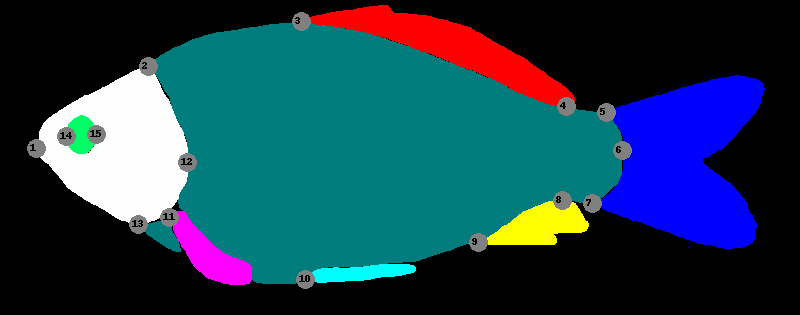

In [50]:
# Visualize the landmark
img_seg.visualize_landmark()

### 3- Measurement part

Functions to calculate what we need to measure what we want!!!

    + img_seg.get_distance(a,b) : measure distance between two point
    + img_seg.measure_eye_area()
    + img_seg.measure_head_area()
    + img_seg.measure_eye_head_ratio()
    + img_seg.calculate_triangle_area(point_1, Poit_2, point_3)
    + img_seg.measure_eye_diameter()
    + img_seg.all_measure() create the following dictionnary using the previous fucntions:
        + measure['SL'] = self.get_distance(landmark['1'],landmark['6'])
        + measure['EA'] = self.measure_eye_area()
        + measure['HAt'] = self.calculate_triangle_area(landmark['1'],landmark['2'],landmark['13'])
        + measure['HAp'] = self.measure_head_area()
        + measure['HCL'] = "WIP"
        + measure['ED'] = self.measure_eye_diameter()
        + measure['HL'] = self.get_distance(landmark['1'],landmark['12'])
        + measure['HD'] = self.get_distance(landmark['2'],landmark['13'])
        + measure['pOD'] = self.get_distance(landmark['1'],landmark['14'])

Now play!

In [51]:
img_seg.all_measure()

{'SL': 586.0034129593445,
 'EA': 922,
 'HAt': 8437.999999999995,
 'HAp': 16034,
 'HCL': 'WIP',
 'ED': 34.262616074167774,
 'HL': 151.64761785138597,
 'HD': 158.3161394173064,
 'pOD': 32.31098884280702}

## Development Section

This is where we make a mess!!!

### Develop a tool to visualize the box around biggest blob for one specific trait

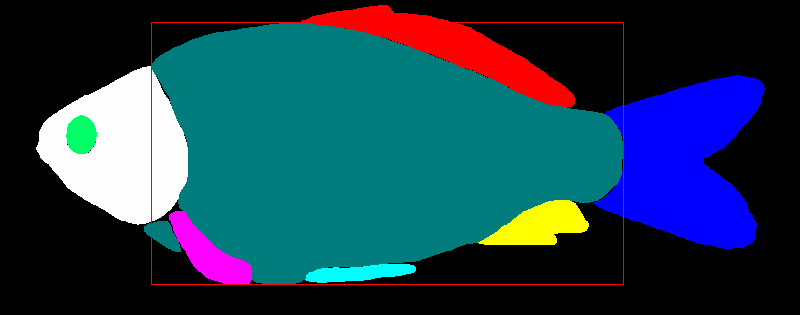

In [34]:
# Develop a tool to visualize the box around biggest blob for one specific trait
# Draw a bbox 
# importing image object from PIL
from PIL import Image, ImageDraw

mask_dict = img_seg.mask
trunk_prop = img_seg.clean_trait_region(mask_dict['trunk'])
trunk_bbox = trunk_prop.bbox

top, left, bottom, right = trunk_bbox
wide = bottom-top
height = right-left
shape = [(left, top), (right,bottom)]
  
# creating new Image object
img_arr = img_seg.img_arr
img = Image.fromarray(img_arr)
img1 = ImageDraw.Draw(img)
  
# create rectangle image
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, outline ="red")
img

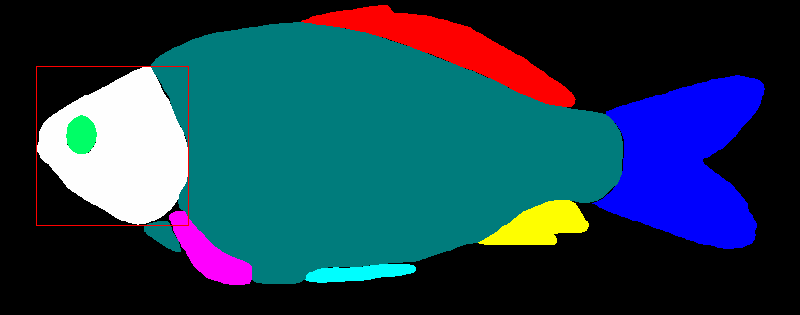

In [14]:
img_seg.visualize_a_bbox('head')

### Test/explore methods to get the trunk upper contour length from landmarks #2 to #5

82724

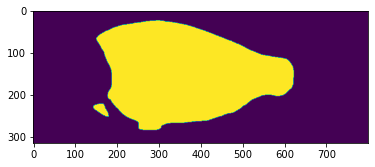

In [18]:
trunk_mask = trunk_pro.image
pad_mask =np.pad(trunk_mask, ((1, 1), (1,1)), 'constant', constant_values=((0, 0),(0,0)))
list_contour = ski.measure.find_contours(trunk_mask)
erosion_trunk = ski.morphology.erosion(pad_mask)
#plt.imshow(pad_mask)
np.all(pad_mask == erosion_trunk)
sum(sum(pad_mask))

In [30]:
print(pad_mask.shape)
print( trunk_mask.shape)
print(ski.measure.perimeter(trunk_mask))
print(ski.measure.perimeter(pad_mask))

(264, 474)
(262, 472)
1277.9453095790602
1277.9453095790602


In [43]:
contour_1 = ski.measure.find_contours(trunk_mask)
print(len(contour_1))
print(sum([a.shape[0] for a in contour_1]))

contour_2 = ski.measure.find_contours(pad_mask)[0]
print(contour_2.shape)

contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
print(sum(sum(contour_)))
contour_3 = ski.measure.find_contours(contour_)[0]
print(sum([a.shape[0] for a in contour_]))

4
1427
(1495, 2)
1128
125136


[array([[262.5, 145. ],
        [262.5, 144. ],
        [262.5, 143. ],
        ...,
        [261.5, 146. ],
        [262. , 145.5],
        [262.5, 145. ]])]

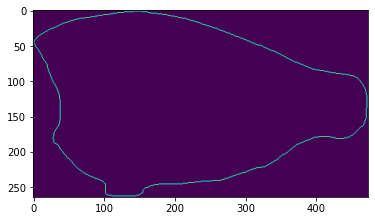

In [70]:
contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
plt.imshow(contour_)
list_contour = ski.measure.find_contours(contour_)
list_contour_2 = ski.measure.find_contours(pad_mask)
list_contour_2


In [88]:
a =list_contour_2[0]
a.shape

(1495, 2)

In [93]:
distance = lambda a,b: ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
distance(list_contour_2[0][0,:],list_contour_2[0][1,:])
a =list_contour_2[0]
list_segment = [distance(a[i,:],a[i+1,:]) for i in range(a.shape[0]-1)]
sum(list_segment)

1280.7737367037953

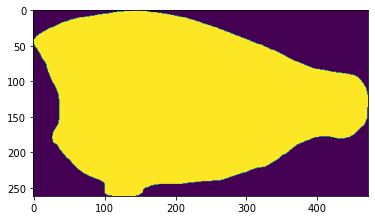

In [17]:
plt.imshow(trunk_pro.image)

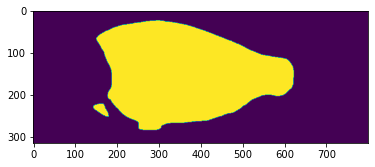

In [6]:
caudal_fin = img_seg.mask['trunk']

plt.imshow(caudal_fin)

### Develop a tool to get landmark #5 and #7 on the caudal fin

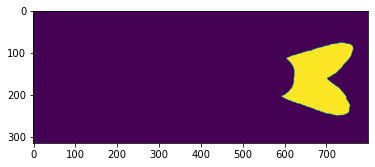

In [13]:
plt.imshow(img_seg.mask['caudal_fin'])

In [22]:
_,_,_,_,center_caudal,new_mask_caudal= img_seg.landmark_generic('caudal_fin')

row_caudal = round(center_caudal[0])
head_horil_line = new_mask_caudal[row_caudal, :]
#head_length = np.count_nonzero( cleaned_mask[:,col_eye]== 1)



In [49]:
def landmark_5_7(img_seg):
    '''
    locate the landmark 5 and 7 of the caudal fin. 
    We split the caudal fin upper and lower part (horizontal line through the middle).
    Then, in each case get the mot left point in the half of the caudal fin
    '''
    _,_,_,_,center_caudal,new_mask_caudal= img_seg.landmark_generic('caudal_fin')
    mask_caudal_5 = new_mask_caudal.copy()
    mask_caudal_7 = new_mask_caudal.copy()
    row_caudal = round(center_caudal[0])

    mask_caudal_5[row_caudal:,:] = 0
    mask_caudal_7[:row_caudal,:] = 0
        
    lm_5_7=[]
    for temp_mask in [mask_caudal_5,mask_caudal_7]:        
        x,y = np.where(temp_mask)
        y_front = y.min()
        x_front = round(np.mean(np.where(temp_mask[:, y_front,])))
        lm_5_7.append((int(x_front),int(y_front)))
    return lm_5_7[0], lm_5_7[1]

In [56]:
lm_5, lm_7 = landmark_5_7(img_seg)

<function PIL.Image.fromarray(obj, mode=None)>

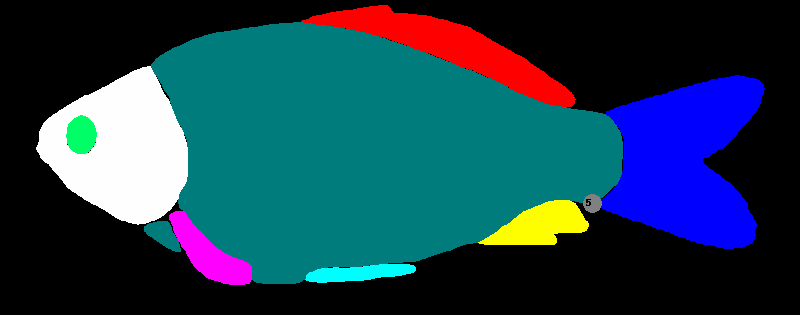

In [57]:
# Function
from PIL import Image
def visualize_landmark(img_arr,coord):
    '''function to visualize one landmark define by coord''' 
    
    text = '5'    
        
    img = Image.fromarray(img_arr)
    img1 = ImageDraw.Draw(img)
        
    #
    #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 15)
    fnt = ImageFont.load_default()

    x,y = coord
    xy = [(y-9,x-9),(y+9,x+9)]
    img1.ellipse(xy, fill='gray', outline=None, width=1)
                
    img1.text((y-6, x-6), text, font=fnt, fill='black')
    # Display the image created
            
    return img
    
    
img_arr = img_seg.img_arr    
visualize_landmark(img_arr,lm_7)

In [15]:
# Example with other image with 2 pevilc fins
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_85194_segmented.png'
#segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
img_seg_2 = tc.segmented_image(segmented_file)
masks_dict_2 = img_seg_2.mask


In [9]:
img_seg_2.measurement

{'SL': 627.5388434192739,
 'EA': 1939,
 'HAt': 5286.499999999997,
 'HAp': 11667,
 'HCL': 'WIP',
 'ED': 49.68713593317168,
 'HL': 158.61904047118682,
 'HD': 114.23221962301179,
 'pOD': 45.39823785126467,
 'BL': 692,
 'BD': 139}

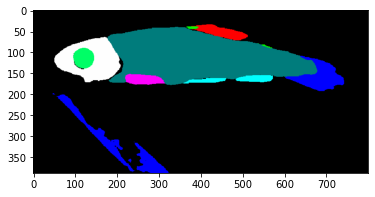

In [99]:
plt.imshow(img_seg_2.img_arr)

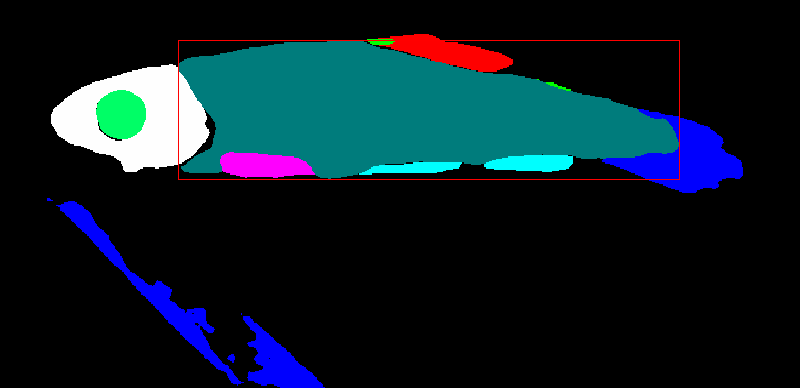

In [20]:
img_seg_2.visualize_a_bbox('trunk')

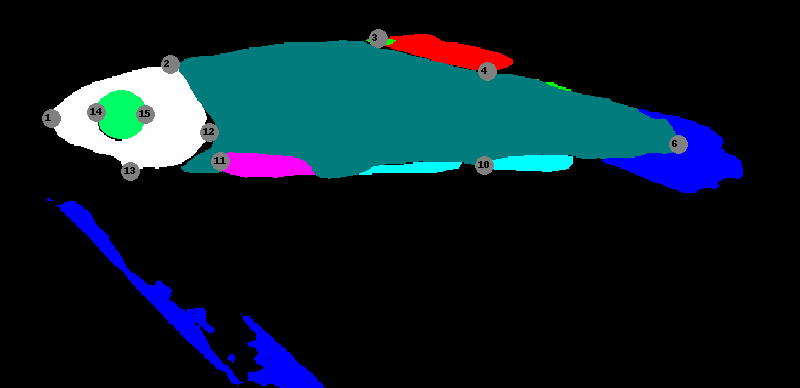

In [19]:
img_seg_2.visualize_landmark()

In [80]:
img_seg_2.landmark_generic('caudal_fin')

([], [], [], [], [], [])

In [79]:
img_seg_2.clean_trait_region(masks_dict_2['caudal_fin'])

[]

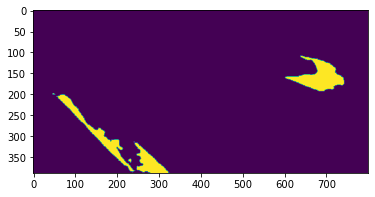

In [42]:
mask = img_seg_2.mask['caudal_fin']
trait_filled = img_seg_2.remove_holes(mask)
total_area = np.count_nonzero(trait_filled == 1)
trait_label = label(trait_filled)
trait_region = regionprops(trait_label)
plt.imshow(trait_filled)
trait_region

In [26]:
img_seg_2.landmark_generic()

NameError: name 'img_seg_2' is not defined

In [100]:
print(img_seg_2.all_landmark())
print(img_seg_2.all_measure())
print(img_seg_2.presence_matrix)

{'1': (118, 51), '2': (64, 170), '3': (38, 378), '4': (71, 487), '5': [], '6': (144, 678), '7': [], '8': [], '9': [], '10': (165, 484), '11': (161, 220), '12': (132, 209), '13': (171, 130), '14': (112, 96), '15': (114, 145)}
{'SL': 627.5388434192739, 'EA': 1939, 'HAt': 5286.499999999997, 'HAp': 11667, 'HCL': 'WIP', 'ED': 49.68713593317168, 'HL': 158.61904047118682, 'HD': 114.23221962301179, 'pOD': 45.39823785126467}
{'dorsal_fin': {'number': 1, 'percentage': 1.0}, 'adipos_fin': {'number': 3, 'percentage': 0.6712328767123288}, 'caudal_fin': {'number': 6, 'percentage': 0.4504856052722858}, 'anal_fin': {'number': 0, 'percentage': 0}, 'pelvic_fin': {'number': 2, 'percentage': 0.5905550146056475}, 'pectoral_fin': {'number': 1, 'percentage': 1.0}, 'head': {'number': 1, 'percentage': 1.0}, 'eye': {'number': 1, 'percentage': 1.0}, 'caudal_fin_ray': {'number': 0, 'percentage': 0}, 'alt_fin_ray': {'number': 0, 'percentage': 0}, 'trunk': {'number': 1, 'percentage': 1.0}}


### Develop measure TL (total length)

In [7]:

import math

img_seg.combine_trait_mask(['head','trunk','caudal_fin'])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
head_trunk_caudal = img_seg.combine_trait_mask(['head','trunk','caudal_fin'])
trait_region= img_seg.clean_trait_region(head_trunk_caudal)
orientation = trait_region.orientation
xb0, yb0, xb1, yb1 = trait_region.bbox
len1 =(yb1-yb0)/math.sin(orientation)
bbox_len = yb1-yb0
print(len1, bbox_len)

729.422881988705 729


In [14]:
# Develop a tool to visualize the box around biggest blob for one specific trait
# Draw a bbox 
# importing image object from PIL
from PIL import Image, ImageDraw


top, left, bottom, right = trait_region.bbox
wide = bottom-top
height = right-left
shape = [(left, top), (right,bottom)]
  
# creating new Image object
img_arr = img_seg.img_arr
img = Image.fromarray(img_arr)
img1 = ImageDraw.Draw(img)
  
# create rectangle image
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, outline ="red")
img
print(top, left, bottom, right)

22 36 284 765


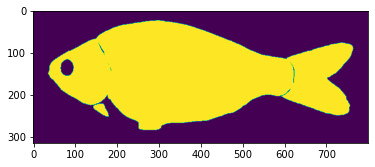

In [62]:
plt.imshow(head_trunk_caudal)

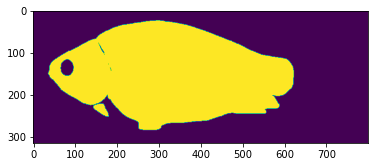

In [78]:
# Example with other image with 2 pevilc fins
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_85194_segmented.png'
#segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
img_seg_2 = tc.segmented_image(segmented_file)
masks_dict_2 = img_seg_2.mask

head_trunk_caudal = img_seg.combine_trait_mask(['head','trunk','anal_fin'])
plt.imshow(head_trunk_caudal)

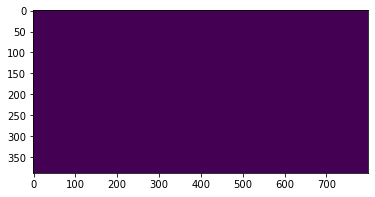

In [23]:
plt.imshow(img_seg_2.mask['anal_fin'])

In [61]:
img_seg_2.measure_body_length()

692

### My Stuff to play

In [50]:
# Example with other image with 2 pevilc fins
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '/fs/ess/PAS2136/BGNN/Minnows/Segmented/INHS_FISH_00190_segmented.png'
#segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
img_seg_2 = tc.segmented_image(segmented_file)

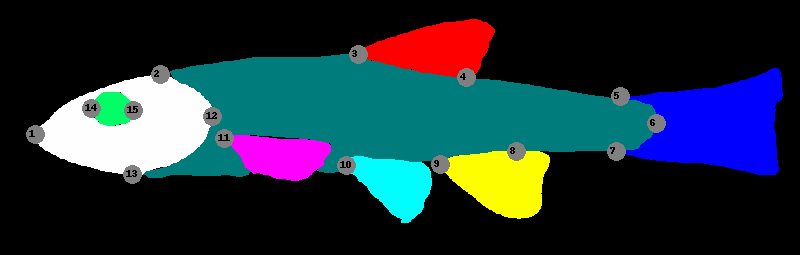

In [43]:
img_seg_2.visualize_landmark()

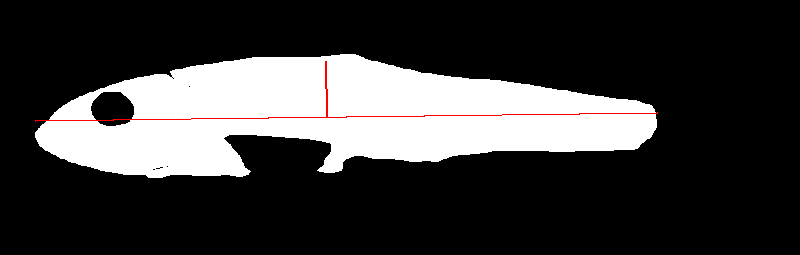

In [51]:
img_seg_2.visualize_major_minor()


In [17]:
img_seg.all_measure()

{'SL': 586.0034129593445,
 'EA': 922,
 'HAt': 8437.999999999995,
 'HAp': 16034,
 'HCL': 'WIP',
 'ED': 34.262616074167774,
 'HL': 151.64761785138597,
 'HD': 158.3161394173064,
 'pOD': 32.31098884280702}

In [22]:
img_seg.measure_using_bbox()

{'SL_bbox': (587,),
 'HL_bbox': 152,
 'ED_bbox': 31,
 'HD': 145,
 'pOD_bbox': 30,
 'fish_angle': 2.0124973591623814}

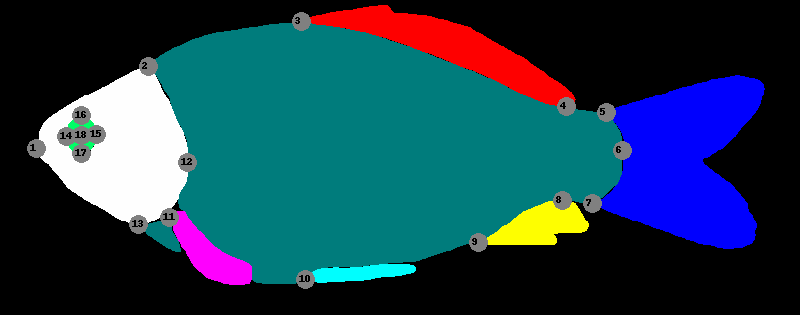

In [18]:
img_seg.visualize_landmark()

In [112]:
_, _, _, _, center_eye, _ = img_seg.landmark_generic('eye')
_, _, _, _, _, new_mask_head = img_seg.landmark_generic('head')

row_eye = round(center_eye[0])
col_eye = round(center_eye[1])
# horizontal line
head_hori_line = new_mask_head[row_eye,:]
index_hori = np.where(head_hori_line == 1)[0]
start_h = (row_eye,np.max(index_hori))
end_h = (row_eye,np.min(index_hori))

# vertical line
head_verti_line = new_mask_head[:,col_eye]
index_verti = np.where(head_verti_line == 1)[0]
start_v = (np.min(index_verti),col_eye)
end_v = (np.max(index_verti),col_eye)

In [115]:
start_v + end_v

(196, 81, 97, 81)

-99


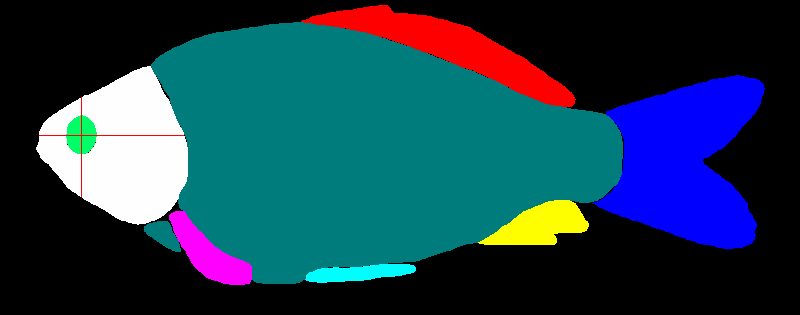

In [117]:
from PIL import Image
img_arr = img_seg.img_arr
img = Image.fromarray(img_arr)
img1 = ImageDraw.Draw(img)

line_h = (end_h[1],end_h[0],start_h[1],start_h[0])
line_v = (end_v[1],end_v[0],start_v[1],start_v[0])
print(end_v[0]-start_v[0])
img1.line(line_h, fill="red")
img1.line(line_v, fill="red")
img

In [39]:
head_depth = np.count_nonzero( head_hori_line)
head_depth

145

In [26]:
img_seg.visualize_trait('head')
print(head_hori_line.shape)
print(new_mask_head.shape)
print(img_seg.img_arr.shape)


(800,)
(315, 800)
(315, 800, 3)


In [38]:
index = np.where(head_hori_line == 1)[0]
np.max(index)
np.min(index)


39

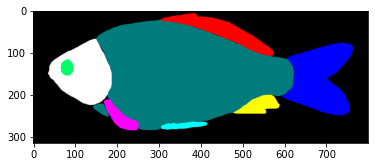

In [24]:
plt.imshow(img_seg.img_arr)
